# PRÁCTICA DE LABORATORIO 1 

## Escribir un código que implemente una caminata aleatoria $1D$, con probabilidad $p$ de moverse a la derecha y probabilidad $q$ de moverse a la izquierda, tal que $p+q=1$ 

<b> Sol. </b>

En este problema, vamos a simular una caminata aleatoria en una dimensión. Imaginemos un punto que comienza en el origen ($X_0 = 0$) y en cada paso puede moverse una unidad a la derecha con probabilidad $p$ o una unidad a la izquierda con probabilidad $q = 1-p$. Cada paso es independiente del anterior. La posición después de $n$ pasos está dada por:

$$ X_n = \sum_{i=1}^n \Delta_i, \quad \Delta_i = \begin{cases} +1 & \text{con prob. } p \\ -1 & \text{con prob. } q \end{cases} $$

De la teoría sabemos que:

- El valor esperado de la posición es $\mathbb{E}[X_n] = n(p - q) = n(2p - 1)$.
- La varianza es $\text{Var}(X_n) = n[1 - (p-q)^2] = 4npq$.

Cuando $p = 0.5$, la caminata es simétrica y la posición media es cero, aunque las trayectorias individuales fluctúan.


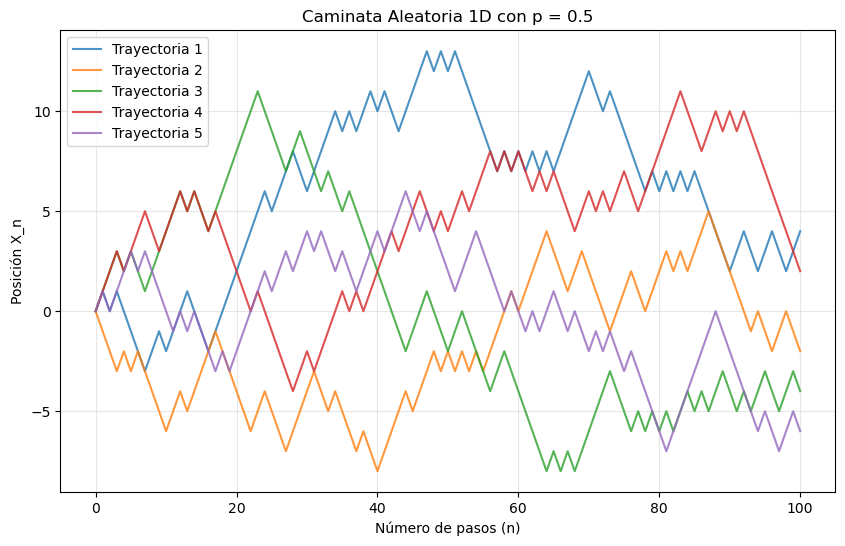

In [2]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.5               # Probabilidad de ir a la derecha
n_pasos = 100         # Número de pasos en cada trayectoria
n_trayectorias = 5    # Cantidad de trayectorias vamos a graficar

# Creamos una matriz de ceros para guardar las posiciones
# Filas: 
# 1. Cada trayectoria
# Columnas: 
# 2. Cada instante de tiempo 
posiciones = np.zeros((n_trayectorias, n_pasos + 1))

# Simulamos cada trayectoria
for i in range(n_trayectorias):
    pos_actual = 0                     # Empezamos en el origen
    posiciones[i, 0] = pos_actual      # Guardamos la posición inicial
    for t in range(1, n_pasos + 1):
        r = np.random.random()          # Número aleatorio entre 0 y 1
        if r < p:
            pos_actual += 1             # Nos movemos a la derecha
        else:
            pos_actual -= 1             # Nos movemos a la izquierda
        posiciones[i, t] = pos_actual   # Guardamos la nueva posición

# Graficamos los resultados
tiempo = np.arange(n_pasos + 1)
plt.figure(figsize=(10, 6))
for i in range(n_trayectorias):
    plt.plot(tiempo, posiciones[i], marker='', linestyle='-', alpha=0.8, label=f'Trayectoria {i+1}')
plt.title(f'Caminata Aleatoria 1D con p = {p}')
plt.xlabel('Número de pasos (n)')
plt.ylabel('Posición X_n')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Después de ejecutar el código varias veces y probar distintos valores para $p$, surjen de manera "natural" algunas preguntas interesantes. 

<b> Pregunta 1.</b>

¿Qué sucede si ponemos p = 0 y p = 1?


<b> Sol. </b>

Con p = 0, la condición r < 0 nunca es verdadera porque r siempre está entre 0 y 1. Por lo tanto, siempre vamos a la izquierda. En la gráfica vemos líneas rectas que bajan constantemente, una pendiente de -1 por paso.

Con p = 1, la condición r < 1 siempre se cumple (excepto si r fuera exactamente 1, pero como es uniforme continuo, la probabilidad de que sea exactamente 1 es cero). Así que siempre vamos a la derecha. Las trayectorias son rectas que suben con pendiente +1.

<b> Pregunta 2. </b>

¿En qué momento la probabilidad de ir a la derecha es exactamente cero?

<b> Sol. </b>

En el código, la probabilidad de ir a la derecha es cero solamente cuando p = 0. En ese caso, el bloque $if r < p$ nunca se ejecuta. De manera análoga, la probabilidad de ir a la izquierda es cero cuando p = 1. Fuera de esos extremos, ambas direcciones son posibles.

<b> Pregunta 3. </b>

¿Cómo cambia la dispersión de las trayectorias con el número de pasos?

<b> Sol. </b>

La varianza es $4npq$. Para p = 0.5, $4pq = 1$, entonces la desviación típica es $\sqrt{n}$. En nuestras gráficas, cuando n_pasos = 100, esperamos que la mayoría de las posiciones finales estén en un rango de más o menos 20 (unas dos desviaciones). Al ejecutar el código, vemos que las trayectorias se alejan del origen y su amplitud crece a medida que avanza el tiempo, lo que concuerda con una varianza creciente.

<b> Pregunta 4.</b>

En el caso simétrico p = 0.5, ¿las trayectorias tienden a volver al origen?

<b> Sol. </b>

No, en un número finito de pasos no hay una tendencia a regresar. Cada trayectoria es errática y puede alejarse bastante. Lo que sí es cierto es que la caminata simétrica en una dimensión es recurrente: eventualmente volverá al origen si se espera el tiempo suficiente, pero en nuestros 100 pasos no necesariamente ocurre. En las gráficas vemos que algunas trayectorias terminan lejos del cero.

<b> Pregunta 5. </b>

¿Qué pasa si aumentamos el número de trayectorias o el número de pasos?

<b> Sol. </b>

Si aumentamos n_trayectorias, por ejemplo a 20, obtenemos más líneas en la gráfica y podemos apreciar mejor la distribución de caminatas. Algunas irán arriba, otras abajo, y la forma general refleja la deriva (si p ≠ 0.5) o la simetría (si p = 0.5).

Si aumentamos n_pasos, por ejemplo a 500, las trayectorias se extienden más horizontalmente y la varianza se hace más notoria. Las posiciones finales estarán más dispersas, como predice la fórmula de la varianza.

<b> Pregunta 6. </b>

¿Hay alguna forma más interactiva de cambiar p sin tener que reejecutar la celda manualmente?

<b> Sol </b>

Sí, podemos usar la librería $ipywidgets$ para crear un deslizador que nos permita modificar p en tiempo real y ver actualizada la gráfica "automáticamente".



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def graficar_trayectorias(p, n_pasos=100, n_trayectorias=5):
    # Simulación
    posiciones = np.zeros((n_trayectorias, n_pasos + 1))
    for i in range(n_trayectorias):
        pos_actual = 0
        posiciones[i, 0] = pos_actual
        for t in range(1, n_pasos + 1):
            r = np.random.random()
            if r < p:
                pos_actual += 1
            else:
                pos_actual -= 1
            posiciones[i, t] = pos_actual
    
    # Gráfica
    tiempo = np.arange(n_pasos + 1)
    plt.figure(figsize=(10, 6))
    for i in range(n_trayectorias):
        plt.plot(tiempo, posiciones[i], marker='', linestyle='-', alpha=0.8, label=f'Trayectoria {i+1}')
    plt.title(f'Caminata Aleatoria 1D con p = {p:.2f}')
    plt.xlabel('Número de pasos (n)')
    plt.ylabel('Posición X_n')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()


In [10]:
# Para la llamada interactiva
interact(graficar_trayectorias,
         p=FloatSlider(min=0.0, max=1.0, step=0.05, value=0.5, description='p'),
         n_pasos=100, n_trayectorias=5);

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, step=0.05), IntSlider(value=100, descri…

### Conclusión

Con este código logramos simular una caminata aleatoria en una dimensión. Al ejecutarlo y responder las preguntas, encontramos lo siguiente:

1. Cuando p = 0 el movil siempre va a la izquierda; cuando p = 1 siempre va a la derecha.

2. Con p = 0.5 no hay dirección preferida, pero las trayectorias se dispersan más a medida que aumentan los pasos, tal como indica la fórmula de la varianza.

3. Para otros valores de p, se observa una desviación clara hacia la derecha (si p > 0.5) o hacia la izquierda (si p < 0.5).

Las preguntas que nos hicimos nos ayudaron a notar detalles importantes: la probabilidad de ir a la derecha solo es cero cuando p = 0, la varianza crece con el número de pasos, y las trayectorias no tienden a regresar al origen en el corto plazo aunque la caminata sea simétrica.

También vimos que podemos hacer el programa más interactivo  ipywidgets, lo que facilita probar distintos valores sin tener que modificar el código cada vez.

:) 